## Ingeniería de Software III - Actualidad Informática

### Ciencia de datos (demo)

#### DS04 - Modelado

---

En esta libreta se comienzan a ejecutar las actividades correspondientes a la fase de modelado. 

---

### Carga de librerias a utilizar

In [1]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

#Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Lectura del dataset generado previamente

In [2]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../data/datos_finales.csv', sep=';')
datos.head()

,pct_ingreso,edad,estado_credito_N,antiguedad_empleado,importe_solicitado,duracion_credito,situacion_vivienda,ingresos,objetivo_credito,tasa_interes,estado_credito,falta_pago
0,40_a_60,menor_25,C,NaN,35000,3,ALQUILER,59000,PERSONAL,16.02,1,Y
1,hasta_20,menor_25,P,5_a_10,1000,2,PROPIA,9600,EDUCACIÓN,11.14,0,N
2,40_a_60,25_a_30,C,menor_5,5500,3,HIPOTECA,9600,SALUD,12.87,1,N
3,40_a_60,menor_25,C,5_a_10,35000,2,ALQUILER,65500,SALUD,15.23,1,N
4,40_a_60,menor_25,C,5_a_10,35000,4,ALQUILER,54400,SALUD,14.27,1,Y


### Revisión de meta-datos

In [3]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

print("Descripción del dataset 'datos_completos'")
reporte_descripcion_dataset(datos)

Descripción del dataset 'datos_completos'
Columnas del dataset:

pct_ingreso
edad
estado_credito_N
antiguedad_empleado
importe_solicitado
duracion_credito
situacion_vivienda
ingresos
objetivo_credito
tasa_interes
estado_credito
falta_pago

Cantidad de filas: 10123


In [15]:
datos.columns

Index(['pct_ingreso', 'edad', 'estado_credito_N', 'antiguedad_empleado',
       'importe_solicitado', 'duracion_credito', 'situacion_vivienda',
       'ingresos', 'objetivo_credito', 'tasa_interes', 'estado_credito',
       'falta_pago'],
      dtype='object')

### Armado de los sets de entrenamiento y testeo

In [4]:
# Se separan los atributos de datos de los de la etiqueta del dataset

labels = datos.falta_pago.values

features = datos[['pct_ingreso', 'edad', 'estado_credito_N', 'importe_solicitado',
       'duracion_credito', 'antiguedad_empleado', 'situacion_vivienda',
       'ingresos', 'objetivo_credito', 'antiguedad_empleado', 'estado_credito']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,pct_ingreso,edad,estado_credito_N,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,antiguedad_empleado,estado_credito
0,40_a_60,menor_25,C,35000,3,NaN,ALQUILER,59000,PERSONAL,NaN,1
1,hasta_20,menor_25,P,1000,2,5_a_10,PROPIA,9600,EDUCACIÓN,5_a_10,0
2,40_a_60,25_a_30,C,5500,3,menor_5,HIPOTECA,9600,SALUD,menor_5,1
3,40_a_60,menor_25,C,35000,2,5_a_10,ALQUILER,65500,SALUD,5_a_10,1
4,40_a_60,menor_25,C,35000,4,5_a_10,ALQUILER,54400,SALUD,5_a_10,1


In [5]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)
data.head()

,importe_solicitado,duracion_credito,ingresos,estado_credito,pct_ingreso_20_a_40,pct_ingreso_40_a_60,pct_ingreso_hasta_20,pct_ingreso_mayor_60,edad_25_a_30,edad_menor_25,...,situacion_vivienda_PROPIA,objetivo_credito_EDUCACIÓN,objetivo_credito_INVERSIONES,objetivo_credito_MEJORAS_HOGAR,objetivo_credito_PAGO_DEUDAS,objetivo_credito_PERSONAL,objetivo_credito_SALUD,antiguedad_empleado_5_a_10,antiguedad_empleado_mayor_10,antiguedad_empleado_menor_5
0,35000,3,59000,1,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,1000,2,9600,0,False,False,True,False,False,True,...,True,True,False,False,False,False,False,True,False,False
2,5500,3,9600,1,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,35000,2,65500,1,False,True,False,False,False,True,...,False,False,False,False,False,False,True,True,False,False
4,35000,4,54400,1,False,True,False,False,False,True,...,False,False,False,False,False,False,True,True,False,False


In [6]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
importe_solicitado                 12000
duracion_credito                       2
ingresos                          200000
estado_credito                         0
pct_ingreso_20_a_40                False
pct_ingreso_40_a_60                False
pct_ingreso_hasta_20                True
pct_ingreso_mayor_60               False
edad_25_a_30                        True
edad_menor_25                      False
estado_credito_N_C                 False
estado_credito_N_P                  True
antiguedad_empleado_5_a_10         False
antiguedad_empleado_mayor_10       False
antiguedad_empleado_menor_5         True
situacion_vivienda_ALQUILER        False
situacion_vivienda_HIPOTECA         True
situacion_vivienda_OTROS           False
situacion_vivienda_PROPIA          False
objetivo_credito_EDUCACIÓN         False
objetivo_credito_INVERSIONES        True
objetivo_credito_MEJORAS_HOGAR     False
objetivo_credito_PAGO_DEUDAS       False
objetivo_credito_PERSONAL 

In [7]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:', accuracy_score(test_labels, prediction))
    print('Reporte de indicadores:\n', classification_report(test_labels, prediction, zero_division='warn'))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()

In [8]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

### Generación de modelos

#### ZeroR

In [9]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier()
clf.fit(train_data, train_labels)

DummyClassifier(constant=None, random_state=None, strategy='prior')

In [10]:
prediction = clf.predict(test_data)

print('Rendimiento obtenido:',accuracy_score(test_labels, prediction))
print('Vista de una muestra de valores de predicción y datos de testeo:')
print(prediction[:10])
print(test_labels[:10])

Rendimiento obtenido: 0.8316870802054523
Vista de una muestra de valores de predicción y datos de testeo:
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
['N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N']


#### Regresión Logística

In [11]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(solver = 'liblinear')

lreg.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='deprecated', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Rendimiento obtenido: 0.8316870802054523
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.83      1.00      0.91      2105
           Y       0.00      0.00      0.00       426

    accuracy                           0.83      2531
   macro avg       0.42      0.50      0.45      2531
weighted avg       0.69      0.83      0.76      2531

Matriz de confusión:


/home/rey/codigo/exa/IS3-Clase-Ciencia-datos/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rey/codigo/exa/IS3-Clase-Ciencia-datos/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rey/codigo/exa/IS3-Clase-Ciencia-datos/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

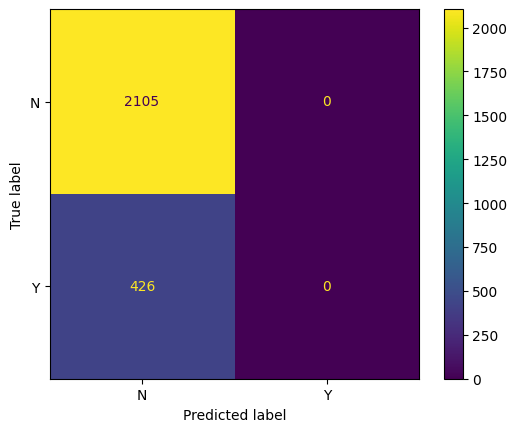

In [12]:
evaluar_modelo(lreg, test_data, test_labels)

#### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50, 
                            algorithm = 'ball_tree', 
                            leaf_size = 25)

knn.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

Rendimiento obtenido: 0.8253654681943896
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.83      1.00      0.90      2089
           Y       0.00      0.00      0.00       442

    accuracy                           0.83      2531
   macro avg       0.41      0.50      0.45      2531
weighted avg       0.68      0.83      0.75      2531

Matriz de confusión:


/home/rey/codigo/exa/IS3-Clase-Ciencia-datos/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rey/codigo/exa/IS3-Clase-Ciencia-datos/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rey/codigo/exa/IS3-Clase-Ciencia-datos/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

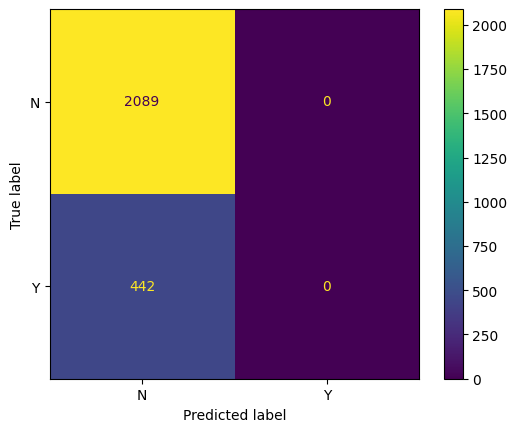

In [27]:
evaluar_modelo(knn, test_data, test_labels)

#### Árboles de Decisión (TDIDT)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dtc = DecisionTreeClassifier(max_depth=3, 
                                criterion='entropy', 
                                min_samples_split=10)

dtc.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

Rendimiento obtenido: 0.8316870802054523
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.83      1.00      0.91      2105
           Y       0.00      0.00      0.00       426

    accuracy                           0.83      2531
   macro avg       0.42      0.50      0.45      2531
weighted avg       0.69      0.83      0.76      2531

Matriz de confusión:


/home/rey/codigo/exa/IS3-Clase-Ciencia-datos/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rey/codigo/exa/IS3-Clase-Ciencia-datos/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rey/codigo/exa/IS3-Clase-Ciencia-datos/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

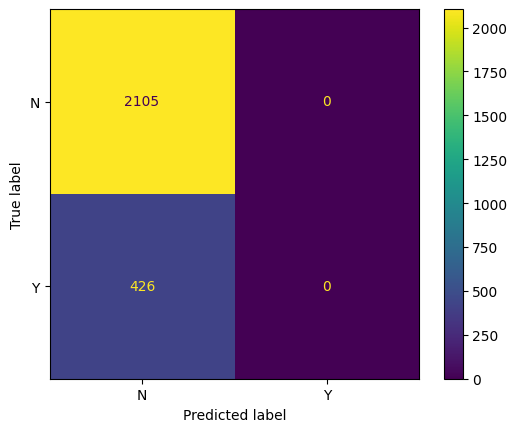

In [14]:
evaluar_modelo(dtc, test_data, test_labels)

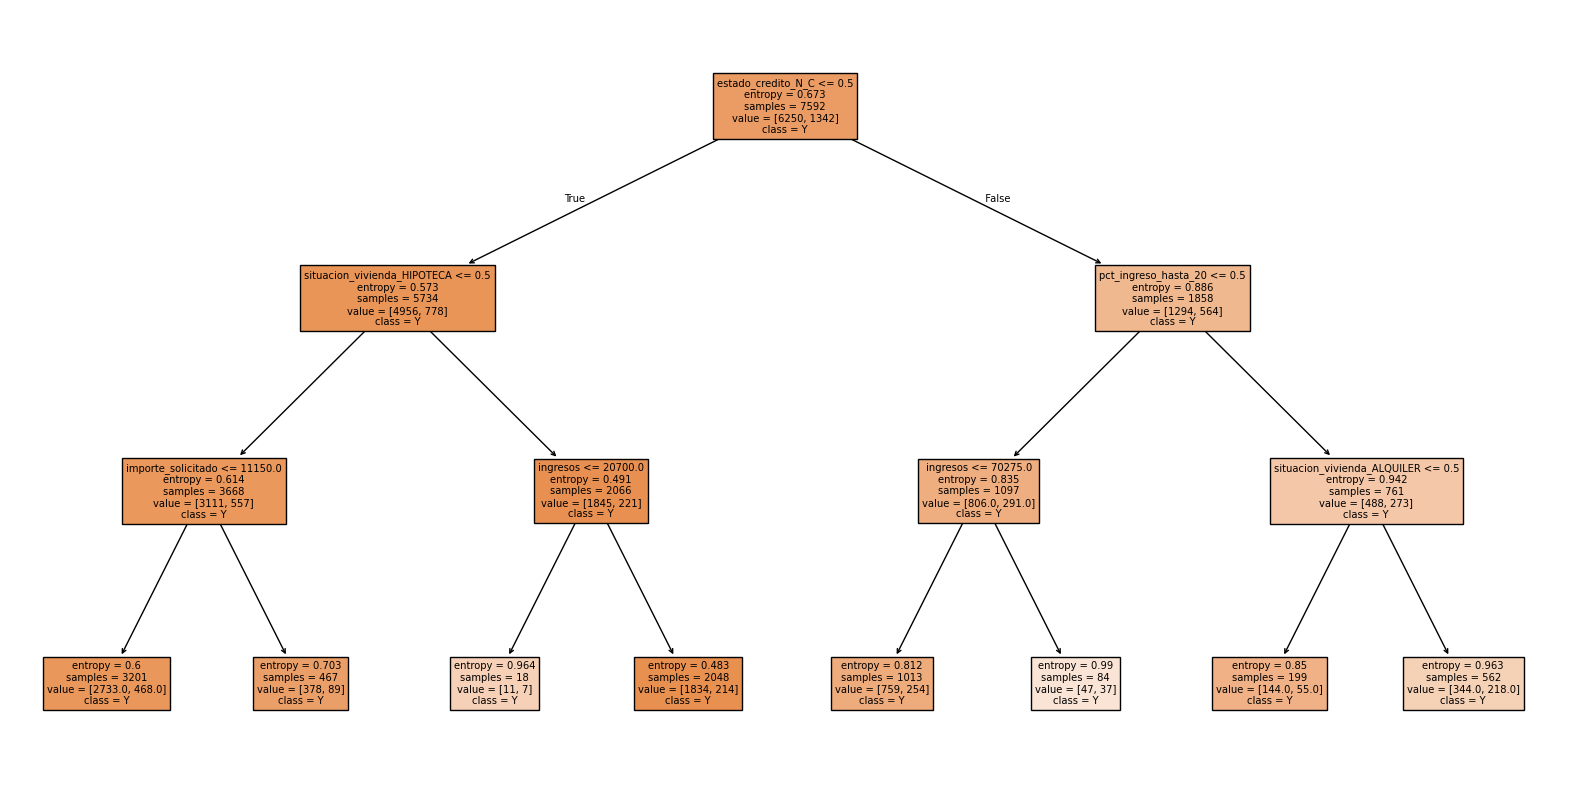

In [15]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

#### Métodos de ensamblado de modelos: RandomForest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rndf = RandomForestClassifier(n_estimators=10)
rndf.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=10, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Rendimiento obtenido: 0.7949427103911497
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.84      0.93      0.88      2105
           Y       0.25      0.11      0.15       426

    accuracy                           0.79      2531
   macro avg       0.54      0.52      0.52      2531
weighted avg       0.74      0.79      0.76      2531

Matriz de confusión:


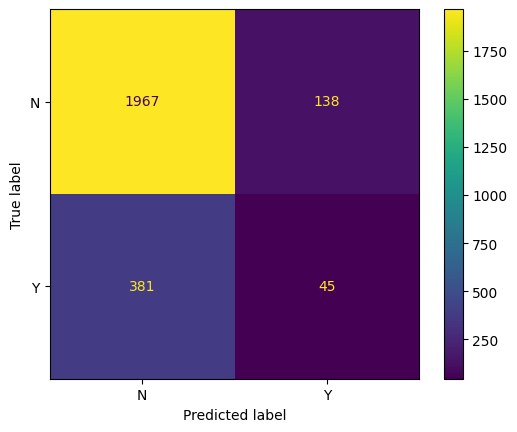

In [17]:
evaluar_modelo(rndf, test_data, test_labels)